<a href="https://colab.research.google.com/github/aweeeaja/Machine-learning/blob/main/Uji_Hipotesa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# libraries
from pandas import DataFrame
import pandas as pd
import numpy as np


In [ ]:
# koneksi ke google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# baca file dataset
df = pd.read_csv("drive/MyDrive/Machine Learning/Kredit_ku.csv")
print(df)
df.info()

     Durasi Riwayat_kredit Tujuan  Jum_kredit Savings Masa_kerja Pekerjaan  \
0         6            A34    A43        1169     A65        A75      A173   
1        48            A32    A43        5951     A61        A73      A173   
2        12            A34    A46        2096     A61        A74      A172   
3        42            A32    A42        7882     A61        A74      A173   
4        24            A33    A40        4870     A61        A73      A173   
..      ...            ...    ...         ...     ...        ...       ...   
144      21            A34    A42        2288     A61        A72      A173   
145      48            A31    A49        3566     A62        A74      A173   
146       6            A34    A40         860     A61        A75      A173   
147      12            A34    A40         682     A62        A74      A173   
148      36            A34    A42        5371     A61        A73      A173   

     Jum_tanggungan  creditScore  
0                 1         

cek missing value

In [ ]:
creditScore_index = ['creditScore']
creditScore_df = df [['creditScore']]
creditScore_df.info()
#cek adakah missing value, true = ada , false = tidak ada
creditScore_df.isnull().values.any()
creditScore_df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   creditScore  149 non-null    int64
dtypes: int64(1)
memory usage: 1.3 KB


creditScore    0
dtype: int64

menghitung komposisi data pada atribut dependent creditScore

In [ ]:
df.creditScore.value_counts()

1    112
2     37
Name: creditScore, dtype: int64

Mengetahui informasi dan ukuran atribut independen

In [ ]:
df_attribute = df.drop(creditScore_df, axis = 1)
df_attribute.info()
df_attribute.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Durasi          149 non-null    int64 
 1   Riwayat_kredit  149 non-null    object
 2   Tujuan          149 non-null    object
 3   Jum_kredit      149 non-null    int64 
 4   Savings         149 non-null    object
 5   Masa_kerja      149 non-null    object
 6   Pekerjaan       149 non-null    object
 7   Jum_tanggungan  149 non-null    int64 
dtypes: int64(3), object(5)
memory usage: 9.4+ KB


(149, 8)

Mengetahui missing value atribut independen

In [ ]:
# cek adakah missing value
df_attribute.isnull().values.any()
df_attribute.isnull().sum()

Durasi            0
Riwayat_kredit    0
Tujuan            0
Jum_kredit        0
Savings           0
Masa_kerja        0
Pekerjaan         0
Jum_tanggungan    0
dtype: int64

Mengetahui atribut yang bertipe kategori

In [ ]:
kategori_df = df.select_dtypes(include=['object'])
kategori_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Riwayat_kredit  149 non-null    object
 1   Tujuan          149 non-null    object
 2   Savings         149 non-null    object
 3   Masa_kerja      149 non-null    object
 4   Pekerjaan       149 non-null    object
dtypes: object(5)
memory usage: 5.9+ KB


mengetahui atribut yang bertipe numerik

In [ ]:
numerik_df = df.select_dtypes(include=['int64'])
numerik_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Durasi          149 non-null    int64
 1   Jum_kredit      149 non-null    int64
 2   Jum_tanggungan  149 non-null    int64
 3   creditScore     149 non-null    int64
dtypes: int64(4)
memory usage: 4.8 KB


Menampilkan histogram atribut bertipe numerik

In [ ]:
numerik_index = numerik_df.columns
numerik_index

Index(['Durasi', 'Jum_kredit', 'Jum_tanggungan', 'creditScore'], dtype='object')

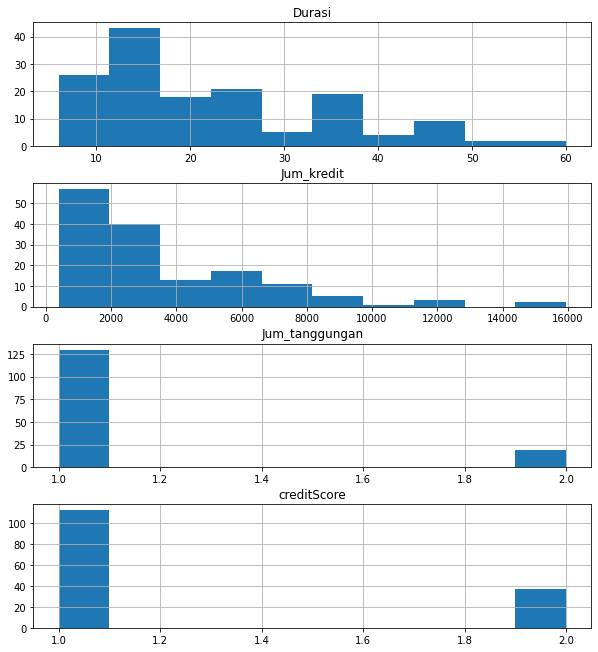

In [ ]:
# menampilkan histogram untuk atribut numerik
import matplotlib
import matplotlib.pyplot as plt
df.hist(column=numerik_index, figsize=(10,20), layout=(7,1))
plt.show()

menampilkan boxplot

<function matplotlib.pyplot.show(close=None, block=None)>

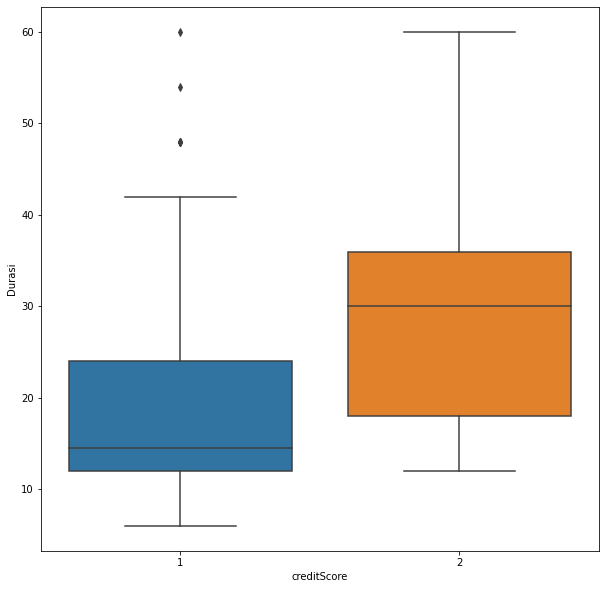

In [ ]:
import seaborn as sns
#uji antara dependent dengan umur
fig = plt.figure(figsize=(10,10))
sns.boxplot(x="creditScore", y="Durasi", data=df)
plt.show

Melakukan uji hipotesis atribut numerik independen vs atribut dependen

In [ ]:
#uji hipotesis
# karena Ho diterima, atribut Durasi terbukti tidak memiliki kontribusi untuk melakukan klasifikasi
import random
from scipy.stats import ttest_ind, ttest_rel
from scipy import stats

df = df[(np.abs(stats.zscore(df["Durasi"])) < 3)]

income_1 = df[df['creditScore']==1]['Durasi']
income_0 = df[df['creditScore']==2]['Durasi']

income_0 = income_0.values.tolist()
income_0 = random.sample(income_0, 10)
income_1 = income_1.values.tolist()
income_1 = random.sample(income_1, 10)

ttest,pval = ttest_ind(income_1,income_0,equal_var = False)
print("ttest", ttest)
print('p value',pval)

if pval <0.05:
  print("Ho ditolak")
else:
  print("Ho diterima")

ttest -1.878580382889632
p value 0.07733301013264882
Ho diterima


In [ ]:
# uji hipotesis
import random
from scipy.stats import ttest_ind, ttest_rel
from scipy import stats

df = df[(np.abs(stats.zscore(df["Jum_kredit"])) < 3)]

income_1 = df[df['creditScore']==1]['Jum_kredit']
income_0 = df[df['creditScore']==2]['Jum_kredit']

income_0 = income_0.values.tolist()
income_0 = random.sample(income_0, 10)
income_1 = income_1.values.tolist()
income_1 = random.sample(income_1, 10)

ttest,pval = ttest_ind(income_1,income_0,equal_var = False)
print("ttest", ttest)
print('p value',pval)

if pval <0.05:
  print("Ho ditolak")
else:
  print("Ho diterima")

ttest -2.522922606232705
p value 0.025480813858256138
Ho ditolak


In [ ]:
# uji hipotesis
import random
from scipy.stats import ttest_ind, ttest_rel
from scipy import stats

df = df[(np.abs(stats.zscore(df["Jum_tanggungan"])) < 3)]

income_1 = df[df['creditScore']==1]['Jum_tanggungan']
income_0 = df[df['creditScore']==2]['Jum_tanggungan']

income_0 = income_0.values.tolist()
income_0 = random.sample(income_0, 10)
income_1 = income_1.values.tolist()
income_1 = random.sample(income_1, 10)

ttest,pval = ttest_ind(income_1,income_0,equal_var = False)
print("ttest", ttest)
print('p value',pval)

if pval <0.05:
  print("Ho ditolak")
else:
  print("Ho diterima")

ttest -1.0000000000000009
p value 0.34343639613791305
Ho diterima


<ipython-input-16-bb59c415f3d5>:16: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  ttest,pval = ttest_ind(income_1,income_0,equal_var = False)


Melakukan uji hipotesis atribut kategori independen vs atribut dependen

**UJI ATRIBUT KATEGORIK**

In [ ]:
def bar_chart(feature):
  Accepted = df[df['creditScore']==1][feature].value_counts()
  Rejected = df[df['creditScore']==2][feature].value_counts()
  df1 = pd.DataFrame([ Accepted, Rejected])
  df1.index=['Accepted','Rejected']
  df1.plot(kind='bar',stacked=True,fig=(18,6),title=feature)

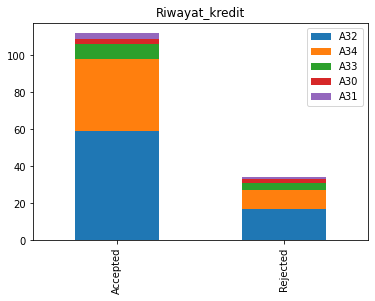

In [ ]:
bar_chart('Riwayat_kredit')

Menampilkan tabel kontingensi

In [ ]:
# contingency table
c_t = pd.crosstab(df['Riwayat_kredit'], df['creditScore'], margins= False)
c_t

creditScore,1,2
Riwayat_kredit,,
A30,3,2
A31,3,1
A32,59,17
A33,8,4
A34,39,10


In [ ]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2

stat, p, dof, expected = chi2_contingency(c_t)
print('dof=%d' % dof)
print('p_value', p)
print(expected)

# interpret test-statistic
prob = 0.99
critical = chi2.ppf(prob, dof)
print('probabilitas=%.3f, critical=%.3f, stat=%.3f' %(prob, critical, stat))
if abs(stat) >= critical:
  print('Dependent (tolak H0)')
else:
  print('Independent (terima H0)')

dof=0
p_value 1.0
[[112.  34.]]
probabilitas=0.990, critical=nan, stat=0.000
Independent (terima H0)


Menampilkan Pearson correlation

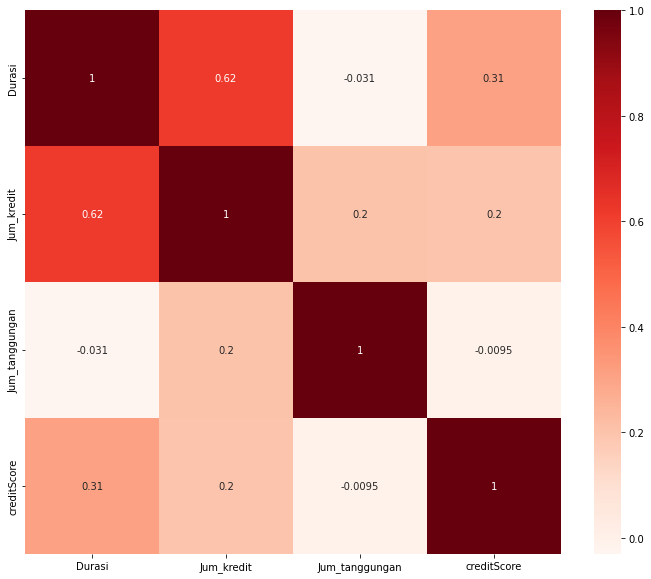

Durasi         0.308726
Jum_kredit     0.196635
creditScore    1.000000
Name: creditScore, dtype: float64

In [ ]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()
#correlation with output variable
cor_target = abs(cor["creditScore"])
# selecting highly correlated features
relevant_features = cor_target[cor_target>0.1]
relevant_features